## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will **predict the expected number of hours of study required to get a particular percentage of marks based on scores and respective hours study data available**. This is a simple linear regression task as it involves just two variables.

#**Importing Libraries**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#**Loading Data**

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


#**Describing Data**

In [4]:
s_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#**Find correlation between the Variables**

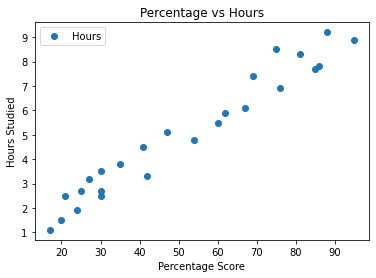

In [59]:
#Plotting the distribution of Hours to get a score
s_data.plot(x='Scores', y='Hours', style='o')  
plt.title('Percentage vs Hours')  
plt.xlabel('Percentage Score')  
plt.ylabel('Hours Studied')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the percentage of score and number of hours studied.**

#**Preparing the data**
**Dependant Variable:**Hours to study

**Independant Variable:**Scores


In [13]:
X_score = s_data.iloc[:, 1:].values  
y_hours = s_data.iloc[:, -2].values  

In [14]:
X_score

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [15]:
y_hours

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

#**Spliting the data in Train and Test**

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [20]:
from sklearn.model_selection import train_test_split
X_train_score, X_test_score, y_train_hours, y_test_hours = train_test_split(X_score, y_hours, 
                            test_size=0.2, random_state=0) 

# **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

##**Creating a Linear Regressor**

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 

##**Fitting the data**

In [22]:
regressor.fit(X_train_score, y_train_hours) 
print("Training complete.")

Training complete.


##**Plotting the data**

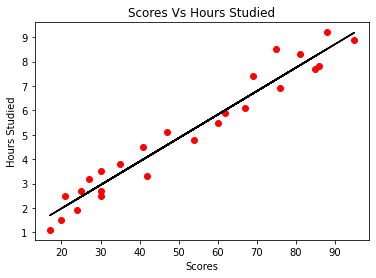

In [41]:
# Plotting the regression line
line = regressor.coef_*X_score+regressor.intercept_

# Plotting for the test data
scatter = plt.scatter(X_score, y_hours,c="Red")
plt.plot(X_score, line,color='black');
plt.xlabel('Scores')  
plt.ylabel('Hours Studied')
plt.title('Scores Vs Hours Studied')
plt.show()

#**Making prediction of Hours of study**

In [42]:
print(X_test_score) # Testing data - In Hours
y_pred_hours = regressor.predict(X_test_score) # Predicting the scores

[[20]
 [27]
 [69]
 [30]
 [62]]


In [43]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test_hours, 'Predicted': y_pred_hours})  
df 

,Actual,Predicted
0,1.5,1.980361
1,3.2,2.652452
2,7.4,6.684994
3,2.5,2.940491
4,5.9,6.012904


# **Evaluating the model**


In [44]:
# You can also test with your own data
score = 55
#own_pred = regressor.predict(hours)
own_pred = regressor.predict(np.array([score]).reshape(1, 1))
print("Score = {}".format(score))
print("Predicted Hours of study = {}".format(own_pred[0]))

Score = 55
Predicted Hours of study = 5.3408135664977126


In [45]:
# You can also test with your own data
score = 35
#own_pred = regressor.predict(hours)
own_pred = regressor.predict(np.array([score]).reshape(1, 1))
print("Score = {}".format(score))
print("Predicted Hours of study = {}".format(own_pred[0]))

Score = 35
Predicted Hours of study = 3.4205551570174717


##**Evalution Metrics of Model: Mean Absolute Error ,Mean squared Error and R2 Score**

In [46]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test_hours, y_pred_hours)) 

Mean Absolute Error: 0.45926193360224854


In [47]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test_hours, y_pred_hours)) 

Mean Squared Error: 0.24971364828844994


In [48]:
from sklearn.metrics import r2_score
print('R2 Score:', 
      metrics.r2_score(y_test_hours, y_pred_hours)) 

R2 Score: 0.9485338729825948
